In [42]:
from skimage import data, io, draw
from bresenham import bresenham
import skimage as ski
from skimage import feature
import cv2 as cv
import numpy as np

In [18]:
def loadImgColor(path):
    img = data.load(path, False)
    return img

In [19]:
def loadImgGrey(path):
    img = data.load(path, True)
    return img

In [13]:
path = "F:\Polibuda\semestr6\informatyka w medycynie - lab\Badanie dna oka"

In [30]:
img = loadImgGrey(path + "\healthy\\01_h.jpg")

In [31]:
def showImage(img):
    io.imshow(img)

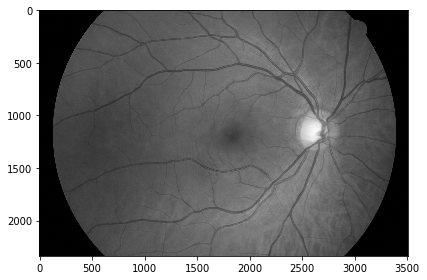

In [32]:
showImage(img)

In [41]:
canny = ski.feature.canny(img, sigma=0)

In [44]:
#addaptive treshold
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)

error: OpenCV(3.4.3) C:\projects\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1524: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


e:\programy\python3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

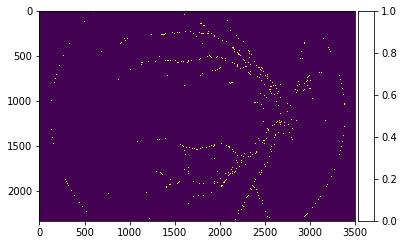

In [40]:
showImage(canny)